# 4. Clasificación: Prediciendo sentimiento de reviews de productos

## Dataset
'amazon_baby.csv' contiene información de reviews de productos de bebe en Amazon. El propósito de este caso de estudio es construir un clasificador de sentimiento que pueda predecir si el review de un producto es positivo o negativo. 

Dentro del dataset se tiene los siguientes datos:
1. `review`: Texto del review escrito por un usuario
2. `name`: Nombre del producto
3. `rating`: Rating del 1 al 5
Existen muchas técnicas para el análisis de sentimiento en texto hoy en día, pero para efectos de este caso, el análisis de sentimiento lo realizaremos usando un conteo de palabras. 

Por ejemplo: Para el review "the sushi was good and the service was excellent" se generaría el conteo de palabras:
"the": 2
"sushi": 1
"was": 2
"good": 1
"and" 1
"service": 1
"excelente": 1

1. Usa `CountVectorize`que se encuentra en klearn.feature_extraction.text para obtener lo feature para tu modelo
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

2. Ahora usa `TfidfVectorizer` para obtgener los features para tu modelo y compáralo contra el anterior
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


 ## Importar dataframe

In [2]:
df=pd.read_csv('amazon_baby.csv' )
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Limpieza de datos

In [3]:
import string
df['review_clean']=df['review'].str.replace('[{}]'.format(string.punctuation), '')
df.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


In [4]:
df=df.fillna({'review':''})
df.shape

(183531, 4)

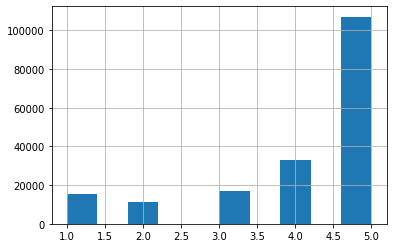

In [5]:
df.rating.hist()

In [7]:
#Quitar 3
df=df[df['rating']!= 3]
df.shape

(166752, 4)

In [8]:
# Cambiar 1,2 por 1 y 3,4 por -1

In [10]:
df['Ranking']=df.rating.apply(lambda x: -1 if x>3 else 1) 
df.pivot_table(index=['Ranking'], aggfunc='size')

Ranking
-1    140259
 1     26493
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(df, test_size=0.2, random_state=0)

In [13]:
print('Size of train_data is :', train.shape)
print('Size of test_data is :', test.shape)

Size of train_data is : (133401, 5)
Size of test_data is : (33351, 5)


In [20]:

from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.transform(train['review_clean'].values.astype('U'))
test_matrix = vectorizer.transform(test['review_clean'].values.astype('U'))


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
sentiment_model = clf.fit(train_matrix,train['Ranking'])

In [22]:
y_pred = sentiment_model.predict(test_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(sentiment_model.score(test_matrix, test.Ranking)))

Accuracy of logistic regression classifier on test set: 0.92


In [23]:
model_coef = pd.DataFrame(sentiment_model.coef_)
model_coef

,0,1,2,3,4,5,6,7,8,9,...,1048566,1048567,1048568,1048569,1048570,1048571,1048572,1048573,1048574,1048575
0,0.031184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.000642,0.0,0.0,0.0,-0.000596


In [29]:
pos_coef = np.sum(sentiment_model.coef_>-0)
print('Coeficientes positivos son  : ',pos_coef)

Coeficientes positivos son  :  56455


In [25]:
sample_test_data = test[10:13]
sample_test_data

,name,review,rating,review_clean,Ranking
27972,"Bumkins Waterproof Superbib, Blue Fizz",I love these bibs! We have about 8 of them in...,5,I love these bibs We have about 8 of them in ...,-1
123316,Safety 1st High Door Lock,"My 4 year old gets up earlier than me, this me...",5,My 4 year old gets up earlier than me this mea...,-1
60874,DadGear Courier Diaper Bag - Orange Retro Stripe,"love the bag, especially since it\'s over the ...",4,love the bag especially since it\s over the sh...,-1


In [26]:
sample_test_data.iloc[0]['review']

"I love these bibs!  We have about 8 of them in different patterns!  They was well!  Even with bleach!We\\'ve been using them for about 4 years!"

In [27]:
sample_test_data.iloc[1]['review']

'My 4 year old gets up earlier than me, this means if he can be quiet he will sneak downstairs and steal sugar.  I don\\\'t usually keep treats (cookies, candies, etc) in the house so he will steal actual sugar.  We tried different disciplines but nothing worked.  He has told us "I don\\\'t want to steal the sugar but my belly tells me to."  We tried all sorts of locks, we needed something to go on the door to the downstairs and not his room b/c he needs to be able to leave to use the bathroom.  Now, I can lock the door at night and know that he won\\\'t be able to sneak down in the morning and steal sugar, or use knives, or the stove, you know, the typical stuff that 4 year olds try to do when they wake up in the morning (oh, that\\\'s not typical you say...hmmmm).  We had tried all the typical door knob locks, and some no drill locks (we were trying not to put holes in as we rent), none of them work, he can defeat them all; they tell me he\\\'s gifted...yay for me?  So even though th

In [28]:
sample_test_matrix = vectorizer.transform(sample_test_data['review_clean'])
scores = sentiment_model.decision_function(sample_test_matrix)
print(scores)

[-6.55032385 -2.19916514 -1.56382507]
